In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [54]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\DSA PROJECT\Breast Cancer METABRIC.csv")

In [55]:
df.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [56]:
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [57]:
# Select only relevant columns from df into a new DataFrame called data

data = df[[
     'Age at Diagnosis',
    'Neoplasm Histologic Grade',
    'Tumor Stage',
    'Tumor Size',
    'Lymph nodes examined positive',
    'Mutation Count',
    'Nottingham prognostic index',
    'ER Status', 'PR Status', 'HER2 Status',
    'Chemotherapy', 'Hormone Therapy', 'Radio Therapy',
    'Cancer Type', 'Cancer Type Detailed',
    'Pam50 + Claudin-low subtype',
    '3-Gene classifier subtype',
    'Inferred Menopausal State',
    'Integrative Cluster',
    'Cellularity',
    'Sex',"Patient's Vital Status"
]]


In [58]:
data

,Age at Diagnosis,Neoplasm Histologic Grade,Tumor Stage,Tumor Size,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,ER Status,PR Status,HER2 Status,...,Radio Therapy,Cancer Type,Cancer Type Detailed,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Inferred Menopausal State,Integrative Cluster,Cellularity,Sex,Patient's Vital Status
0,75.65,3.0,2.0,22.0,10.0,NaN,6.044,Positive,Negative,Negative,...,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,claudin-low,ER-/HER2-,Post,4ER+,NaN,Female,Living
1,43.19,3.0,1.0,10.0,0.0,2.0,4.020,Positive,Positive,Negative,...,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,LumA,ER+/HER2- High Prolif,Pre,4ER+,High,Female,Living
2,48.87,2.0,2.0,15.0,1.0,2.0,4.030,Positive,Positive,Negative,...,No,Breast Cancer,Breast Invasive Ductal Carcinoma,LumB,NaN,Pre,3,High,Female,Died of Disease
3,47.68,2.0,2.0,25.0,3.0,1.0,4.050,Positive,Positive,Negative,...,Yes,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,LumB,NaN,Pre,9,Moderate,Female,Living
4,76.97,3.0,2.0,40.0,8.0,2.0,6.080,Positive,Positive,Negative,...,Yes,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,LumB,ER+/HER2- High Prolif,Post,9,High,Female,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,70.05,1.0,1.0,27.0,0.0,2.0,2.540,Positive,NaN,NaN,...,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,Female,NaN
2505,63.60,2.0,2.0,28.0,0.0,4.0,4.560,Positive,NaN,NaN,...,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,Female,NaN
2506,NaN,NaN,0.0,NaN,0.0,6.0,NaN,NaN,NaN,NaN,...,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,Female,NaN
2507,NaN,NaN,0.0,NaN,0.0,7.0,NaN,NaN,NaN,NaN,...,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,Female,NaN


In [59]:
data.isna().sum(

)

Age at Diagnosis                  11
Neoplasm Histologic Grade        121
Tumor Stage                      721
Tumor Size                       149
Lymph nodes examined positive    266
Mutation Count                   152
Nottingham prognostic index      222
ER Status                         40
PR Status                        529
HER2 Status                      529
Chemotherapy                     529
Hormone Therapy                  529
Radio Therapy                    529
Cancer Type                        0
Cancer Type Detailed               0
Pam50 + Claudin-low subtype      529
3-Gene classifier subtype        745
Inferred Menopausal State        529
Integrative Cluster              529
Cellularity                      592
Sex                                0
Patient's Vital Status           529
dtype: int64

In [60]:
data.dropna()

,Age at Diagnosis,Neoplasm Histologic Grade,Tumor Stage,Tumor Size,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,ER Status,PR Status,HER2 Status,...,Radio Therapy,Cancer Type,Cancer Type Detailed,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Inferred Menopausal State,Integrative Cluster,Cellularity,Sex,Patient's Vital Status
1,43.19,3.0,1.0,10.0,0.0,2.0,4.020,Positive,Positive,Negative,...,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,LumA,ER+/HER2- High Prolif,Pre,4ER+,High,Female,Living
4,76.97,3.0,2.0,40.0,8.0,2.0,6.080,Positive,Positive,Negative,...,Yes,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,LumB,ER+/HER2- High Prolif,Post,9,High,Female,Died of Disease
5,78.77,3.0,4.0,31.0,0.0,4.0,4.062,Positive,Positive,Negative,...,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,LumB,ER+/HER2- High Prolif,Post,7,Moderate,Female,Died of Disease
10,86.41,3.0,2.0,16.0,1.0,4.0,5.032,Positive,Negative,Negative,...,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,LumB,ER+/HER2- High Prolif,Post,9,Moderate,Female,Died of Other Causes
11,84.22,2.0,2.0,28.0,0.0,5.0,3.056,Positive,Negative,Negative,...,No,Breast Cancer,Breast Invasive Lobular Carcinoma,Her2,ER+/HER2- High Prolif,Post,3,High,Female,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,71.22,2.0,2.0,30.0,4.0,11.0,5.060,Positive,Positive,Negative,...,No,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,LumA,ER+/HER2- Low Prolif,Post,3,High,Female,Died of Other Causes
1698,70.65,1.0,1.0,20.0,0.0,9.0,2.040,Positive,Positive,Negative,...,Yes,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,LumB,ER+/HER2- Low Prolif,Post,8,High,Female,Living
1700,75.62,3.0,1.0,20.0,0.0,4.0,4.040,Negative,Negative,Negative,...,No,Breast Cancer,Breast Invasive Ductal Carcinoma,Basal,ER-/HER2-,Post,10,High,Female,Died of Other Causes
1702,52.84,2.0,2.0,20.0,6.0,5.0,5.040,Positive,Positive,Negative,...,Yes,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Normal,ER+/HER2- High Prolif,Post,8,High,Female,Living


In [61]:
data.duplicated().sum()

np.int64(5)

In [62]:
data.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25716\2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [63]:
for i in data.columns:
    print(f"name_of_the_column : {i}   datatype : {data[i].dtype}   values : {data[i].unique()}")
    print("/n")


name_of_the_column : Age at Diagnosis   datatype : float64   values : [75.65 43.19 48.87 ... 72.   64.35 67.58]
/n
name_of_the_column : Neoplasm Histologic Grade   datatype : float64   values : [ 3.  2.  1. nan]
/n
name_of_the_column : Tumor Stage   datatype : float64   values : [ 2.  1.  4.  3.  0. nan]
/n
name_of_the_column : Tumor Size   datatype : float64   values : [ 22.    10.    15.    25.    40.    31.    65.    29.    34.    16.
  28.    21.    19.    36.    33.    23.    17.    18.    12.    50.
  24.    13.    14.    55.    30.    39.    70.    45.    27.   150.
  60.    26.    20.     9.    35.    80.    38.     2.    52.    44.
  48.     3.     5.    46.    11.      nan  53.    47.    32.    67.
  43.    42.   180.    57.     4.   100.    37.    90.     8.   160.
  84.   130.     5.5   62.     1.    49.    99.    68.     7.    41.
   6.    75.    51.   120.    61.    79.    71.    22.5   17.9   14.5
  12.8   18.5   15.5   21.5   16.9   24.4   12.5   40.3   11.8   32.6
  17

In [64]:
data = data.dropna()
data = data.drop_duplicates()

data.drop("Sex", axis=True, inplace=True)


In [65]:
data.Cellularity.unique()

array(['High', 'Moderate', 'Low'], dtype=object)

In [66]:
columns_to_drop = [
    'Cancer Type',
    'Cancer Type Detailed',
    'Pam50 + Claudin-low subtype',
    '3-Gene classifier subtype'
]

data = data.drop(columns=columns_to_drop)

In [67]:
for i in data.columns:
    print(f"name_of_the_column : {i}   datatype : {data[i].dtype}   values : {data[i].unique()}")
    print("/n")

name_of_the_column : Age at Diagnosis   datatype : float64   values : [43.19 76.97 78.77 ... 71.22 75.62 52.84]
/n
name_of_the_column : Neoplasm Histologic Grade   datatype : float64   values : [3. 2. 1.]
/n
name_of_the_column : Tumor Stage   datatype : float64   values : [1. 2. 4. 3.]
/n
name_of_the_column : Tumor Size   datatype : float64   values : [ 10.   40.   31.   16.   28.   22.   23.   39.   34.   70.   45.   27.
 150.   30.   25.   60.   26.   20.   50.    9.   14.   80.   13.   18.
  38.   19.   12.   52.   24.   17.   44.   36.   21.   48.   35.   46.
  15.   11.   53.   55.   29.   47.   32.   67.   43.   42.  180.   57.
 100.   65.   90.    8.  160.   84.   37.    5.5  49.   99.    1.   68.
   7.   33.   41.    6.    2.   75. ]
/n
name_of_the_column : Lymph nodes examined positive   datatype : float64   values : [ 0.  8.  1. 16.  5. 14.  6.  2.  3.  9. 22.  4.  7. 21. 12. 25. 10. 41.
 15. 13. 11. 19. 17. 23. 18. 31.]
/n
name_of_the_column : Mutation Count   datatype : flo

converting the categorical columns into numercial 

In [68]:
# Define the mapping
mapp = {
    "High": 2,
    "Moderate": 1,
    "Low": 0
}

# Convert the column using map and handle unknowns or NaNs
data["Cellularity"] = data["Cellularity"].map(mapp)

# Optional: check unique values after conversion
print(data["Cellularity"].unique())


[2 1 0]


In [69]:


# Combining '4ER+' and '4ER-' as '4'
def conversion(col):
    if col == "4ER+" or col=="4ER-":
        mapp = {
        "4ER+" : 4,  
        "4ER-" : 4
        }
        return mapp[col]
    else:
        return col

data['Integrative Cluster'] = data['Integrative Cluster'].apply(conversion)
data['Integrative Cluster'] = pd.to_numeric(data['Integrative Cluster'], errors='coerce')

data['Integrative Cluster'].unique()

array([ 4,  9,  7,  3, 10,  8,  6,  1,  2,  5])

In [70]:
# List of columns to encode
columns_to_encode = [
    'ER Status', 'PR Status', 'HER2 Status',
    'Chemotherapy', 'Hormone Therapy', 'Radio Therapy',
    'Inferred Menopausal State']

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to each column
for col in columns_to_encode:
    if col in data.columns:
        data[col] = le.fit_transform(data[col].astype(str))

In [71]:
data.columns

Index(['Age at Diagnosis', 'Neoplasm Histologic Grade', 'Tumor Stage',
       'Tumor Size', 'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'ER Status', 'PR Status', 'HER2 Status',
       'Chemotherapy', 'Hormone Therapy', 'Radio Therapy',
       'Inferred Menopausal State', 'Integrative Cluster', 'Cellularity',
       'Patient's Vital Status'],
      dtype='object')

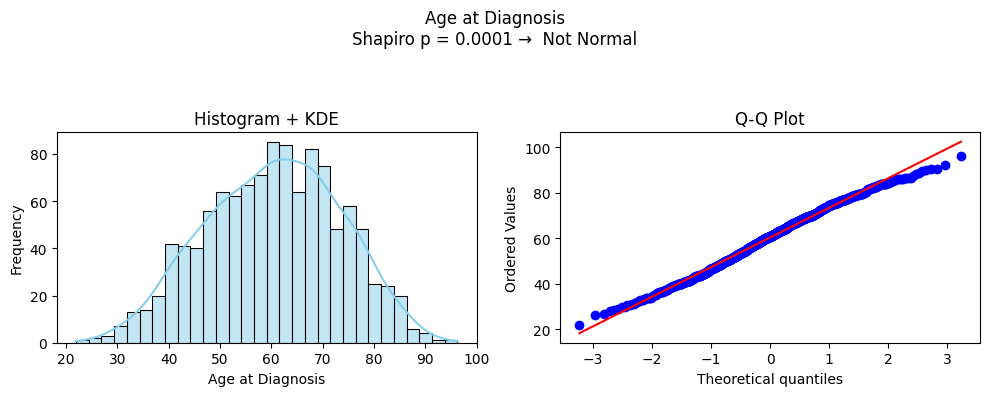

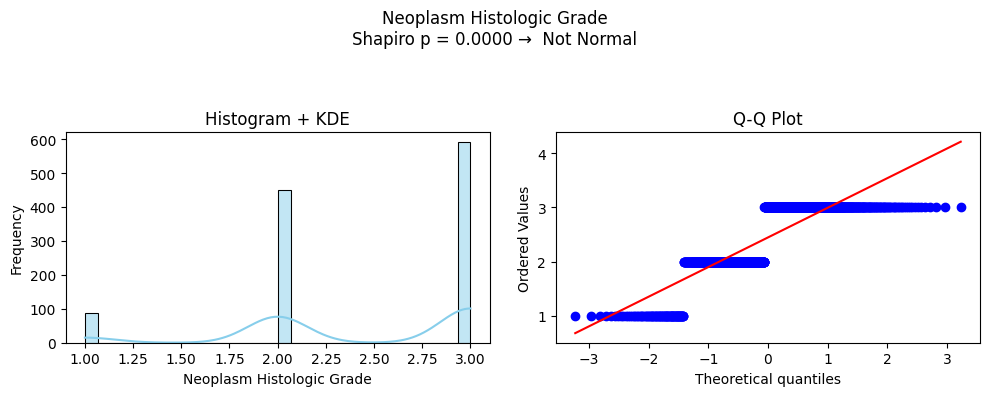

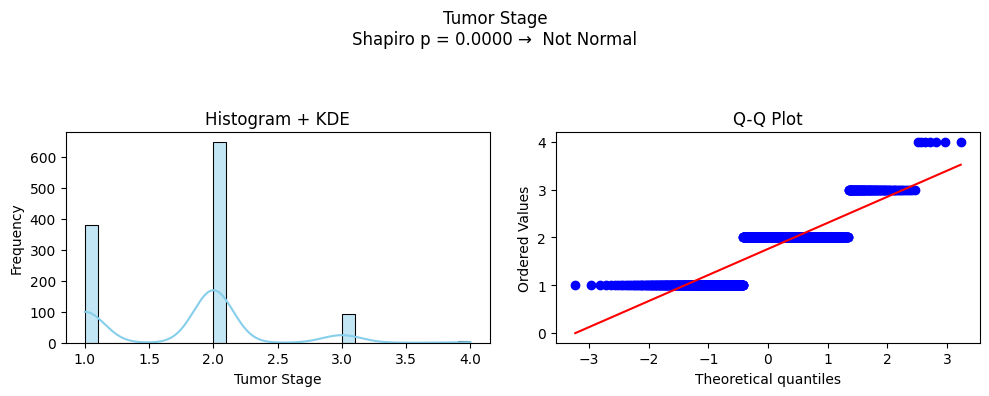

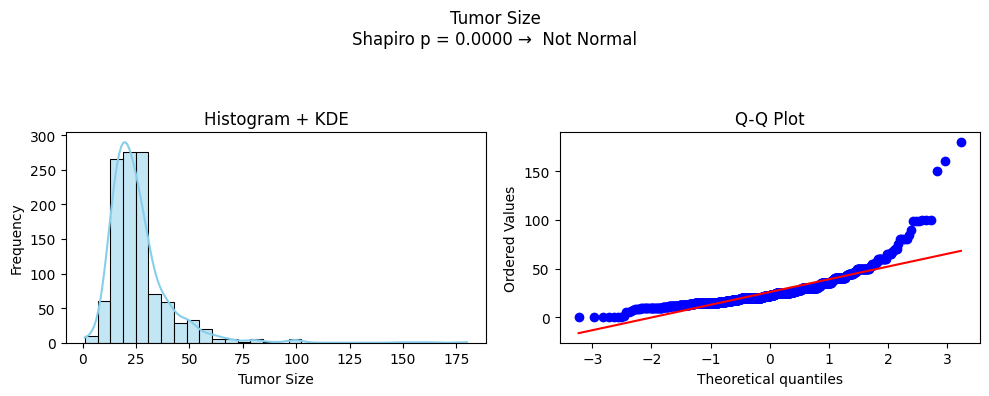

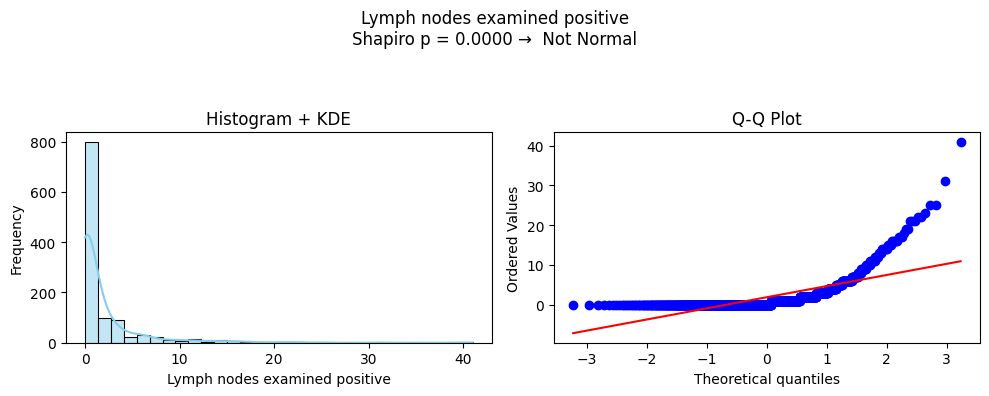

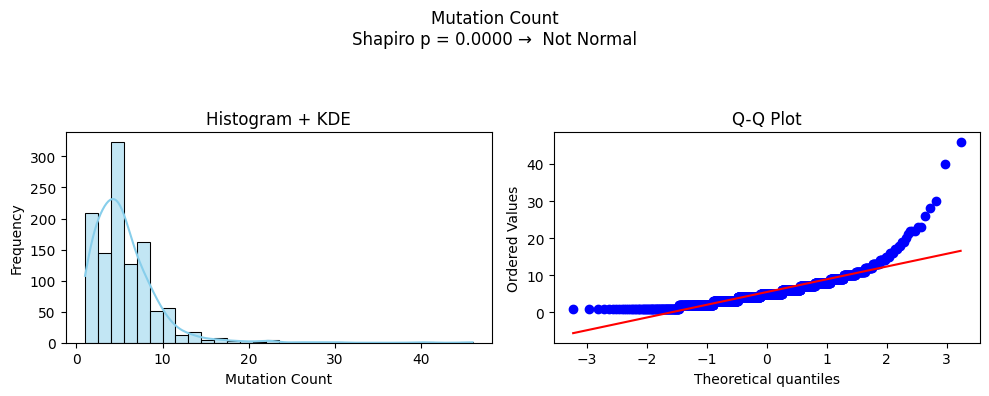

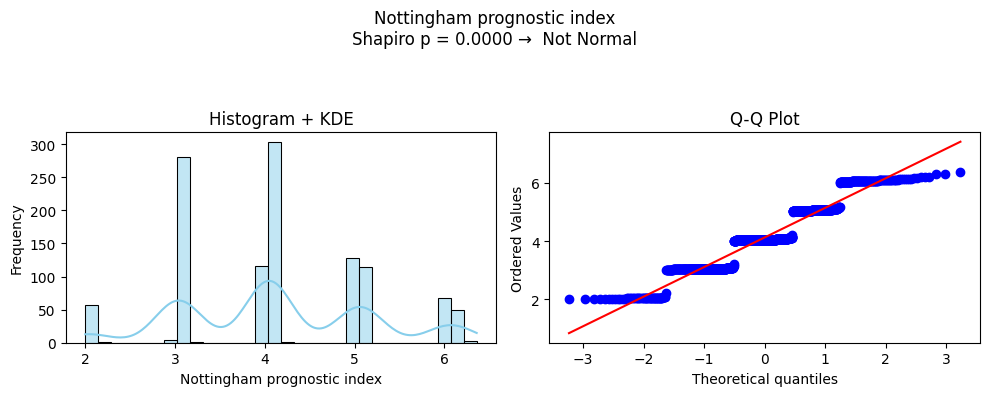

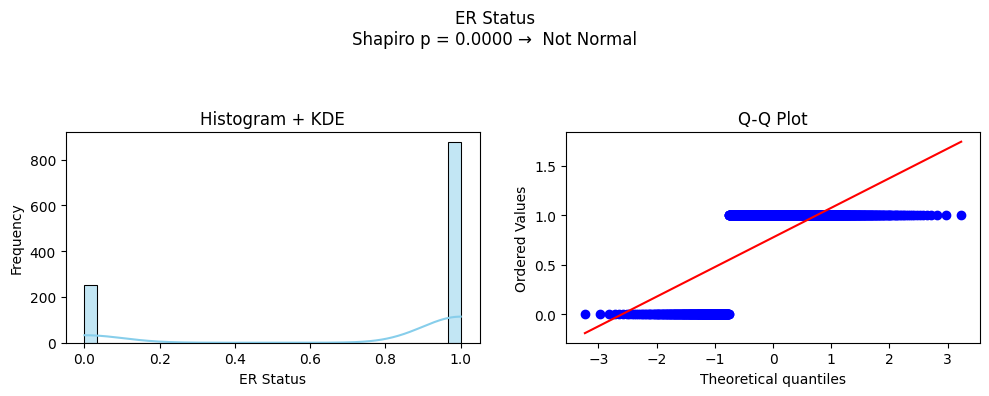

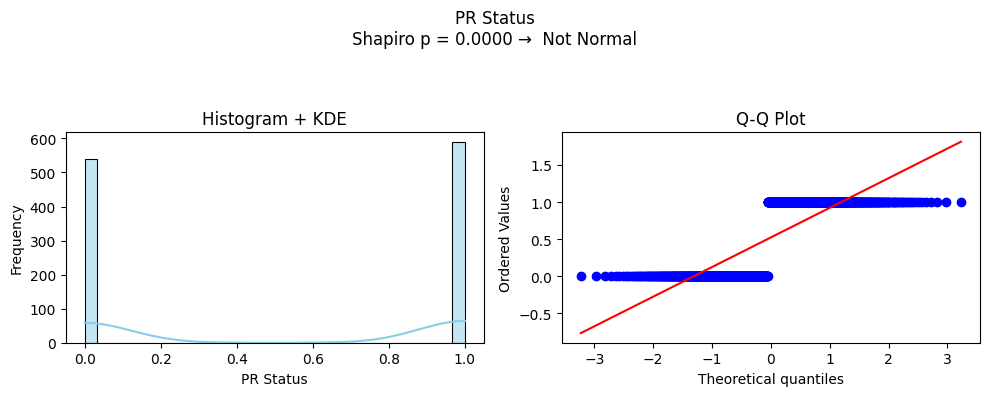

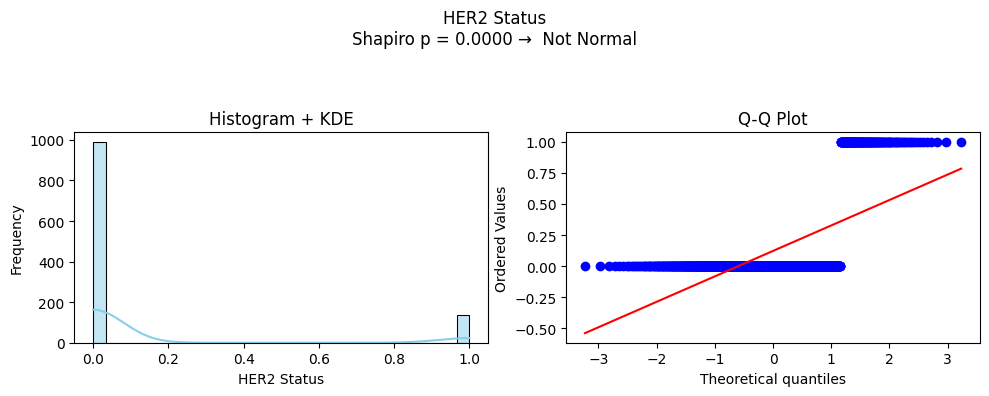

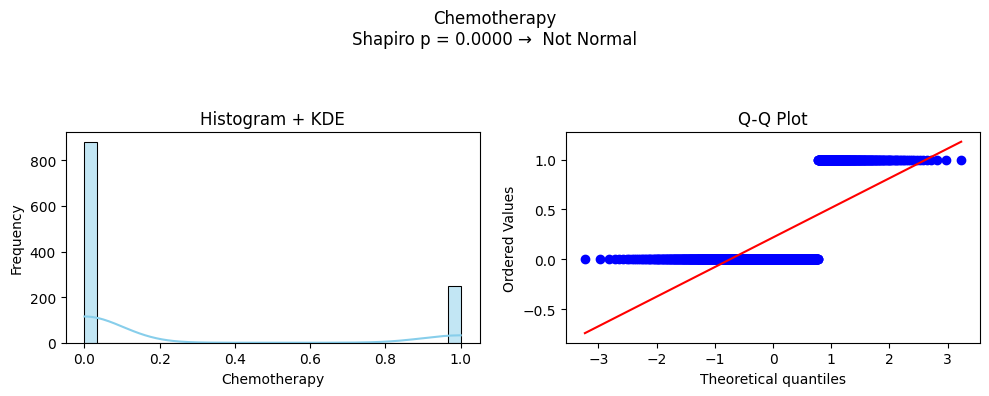

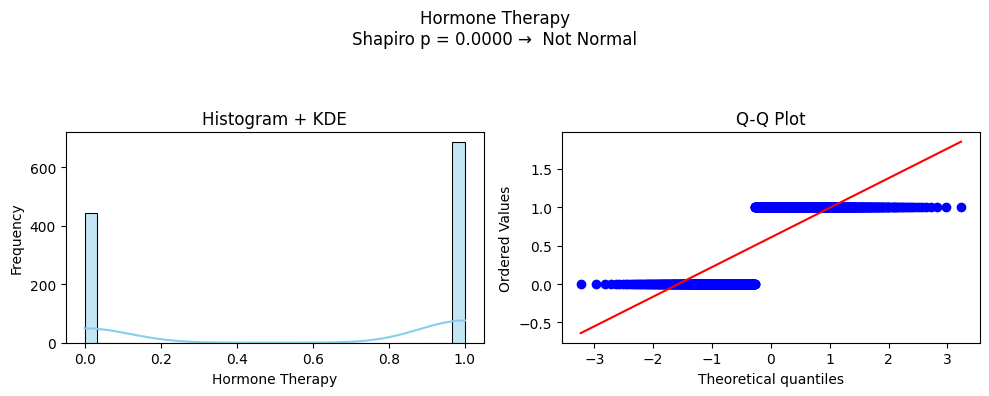

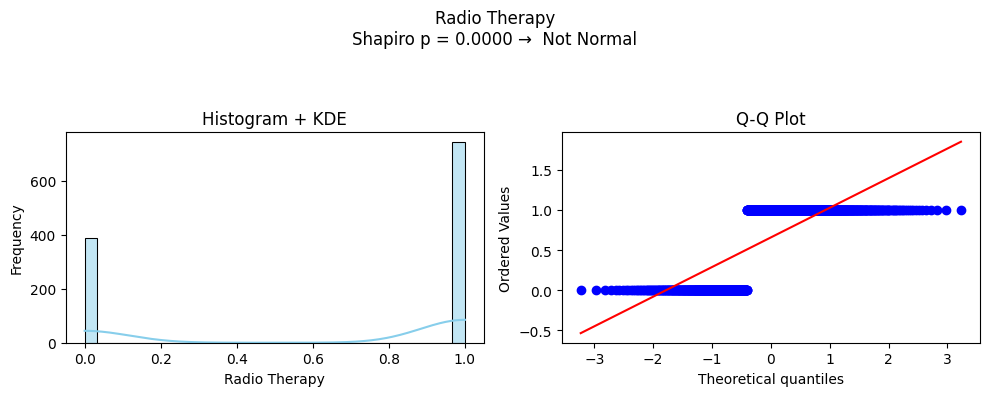

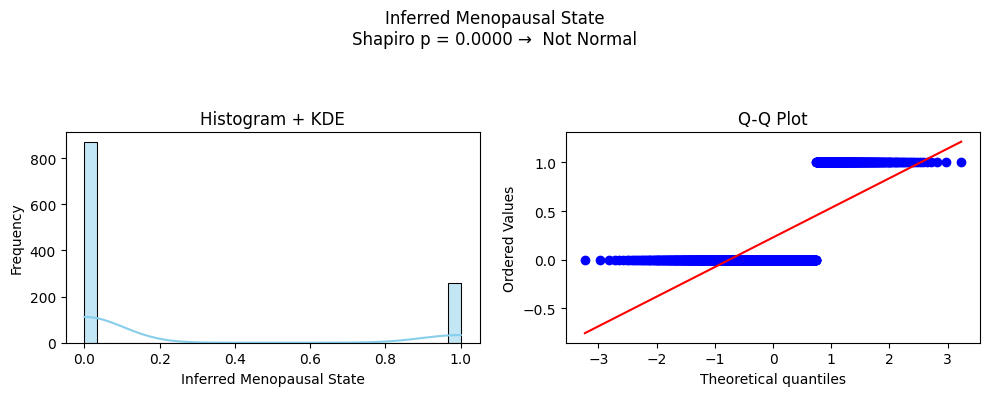

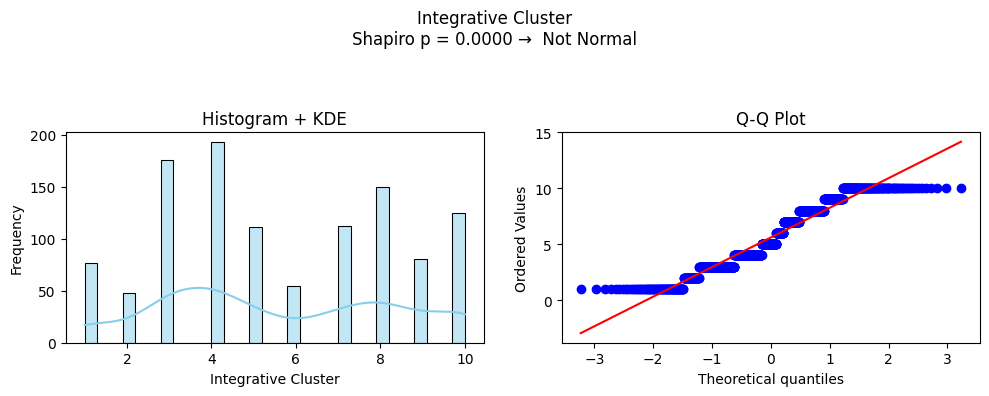

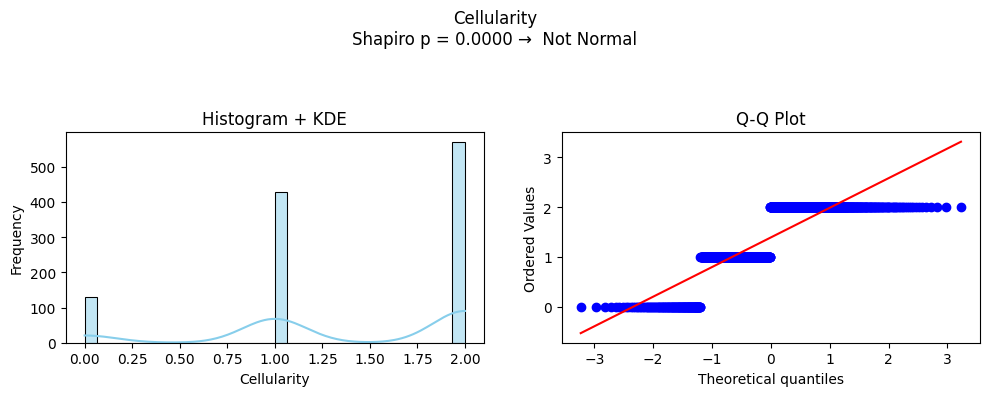

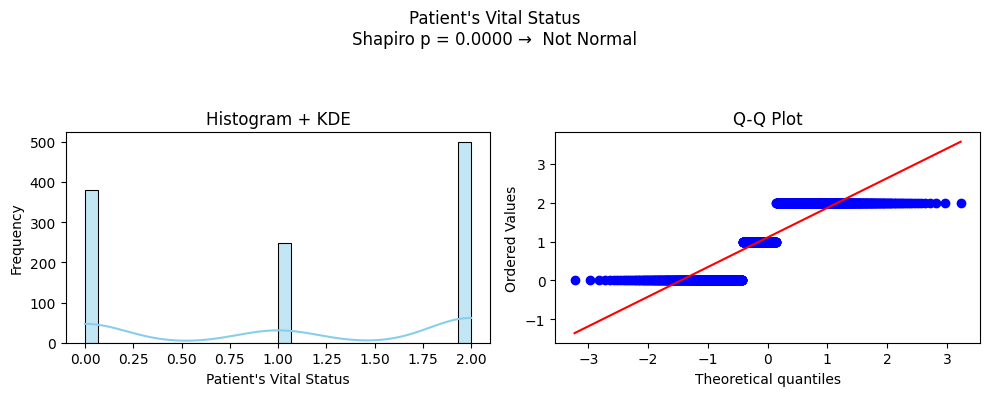

In [72]:
for col in data.columns:
    # Drop missing values
    values = data[col].dropna()

    # Skip if empty after dropna
    if len(values) == 0:
        print(f"Skipping column '{col}'all values are NaN.")
        continue

    # Convert object/categorical to numeric for plotting
    if values.dtype == 'object' or str(values.dtype).startswith('category'):
        values = pd.Categorical(values).codes

    # Shapiro-Wilk test (optional)
    if 3 <= len(values) <= 5000:
        stat, p = shapiro(values)
        result = f"Shapiro p = {p:.4f} → {'Normal' if p > 0.05 else ' Not Normal'}"
    else:
        result = "Shapiro test skipped"

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"{col}\n{result}", fontsize=12)

    # Histogram + KDE
    sns.histplot(values, kde=True, ax=axs[0], bins=30, color='skyblue')
    axs[0].set_title("Histogram + KDE")
    axs[0].set_xlabel(col)
    axs[0].set_ylabel("Frequency")

    # Q-Q plot
    probplot(values, dist="norm", plot=axs[1])
    axs[1].set_title("Q-Q Plot")

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

## Outliers removel


In [73]:
def remove_outliers_iqr(data):
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = data[(data[col] < lower_bound) & (data[col] > upper_bound)]
            print(f"number of outliers {col} : {len(outliers)}")
            print("/n")

            # Keep only values within bounds
            data_clean = data[(data[col] > lower_bound) & (data[col] < upper_bound)]

    return data_clean

# Apply to your dataset
data_iqr_cleaned = remove_outliers_iqr(data)

number of outliers Age at Diagnosis : 0
/n
number of outliers Neoplasm Histologic Grade : 0
/n
number of outliers Tumor Stage : 0
/n
number of outliers Tumor Size : 0
/n
number of outliers Lymph nodes examined positive : 0
/n
number of outliers Mutation Count : 0
/n
number of outliers Nottingham prognostic index : 0
/n
number of outliers ER Status : 0
/n
number of outliers PR Status : 0
/n
number of outliers HER2 Status : 0
/n
number of outliers Chemotherapy : 0
/n
number of outliers Hormone Therapy : 0
/n
number of outliers Radio Therapy : 0
/n
number of outliers Inferred Menopausal State : 0
/n
number of outliers Integrative Cluster : 0
/n
number of outliers Cellularity : 0
/n


In [74]:
numeric_cols = data.select_dtypes(include='number').columns

def count_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)].shape[0]

for col in numeric_cols:
    before = count_outliers_iqr(data, col)
    after = count_outliers_iqr(data_iqr_cleaned, col)
    print(f"{col}: {before} → {after} outliers")

Age at Diagnosis: 1 → 1 outliers
Neoplasm Histologic Grade: 0 → 0 outliers
Tumor Stage: 7 → 7 outliers
Tumor Size: 79 → 79 outliers
Lymph nodes examined positive: 118 → 118 outliers
Mutation Count: 34 → 34 outliers
Nottingham prognostic index: 0 → 0 outliers
ER Status: 252 → 252 outliers
PR Status: 0 → 0 outliers
HER2 Status: 139 → 139 outliers
Chemotherapy: 248 → 248 outliers
Hormone Therapy: 0 → 0 outliers
Radio Therapy: 0 → 0 outliers
Inferred Menopausal State: 259 → 259 outliers
Integrative Cluster: 0 → 0 outliers
Cellularity: 0 → 0 outliers


## Feature selection

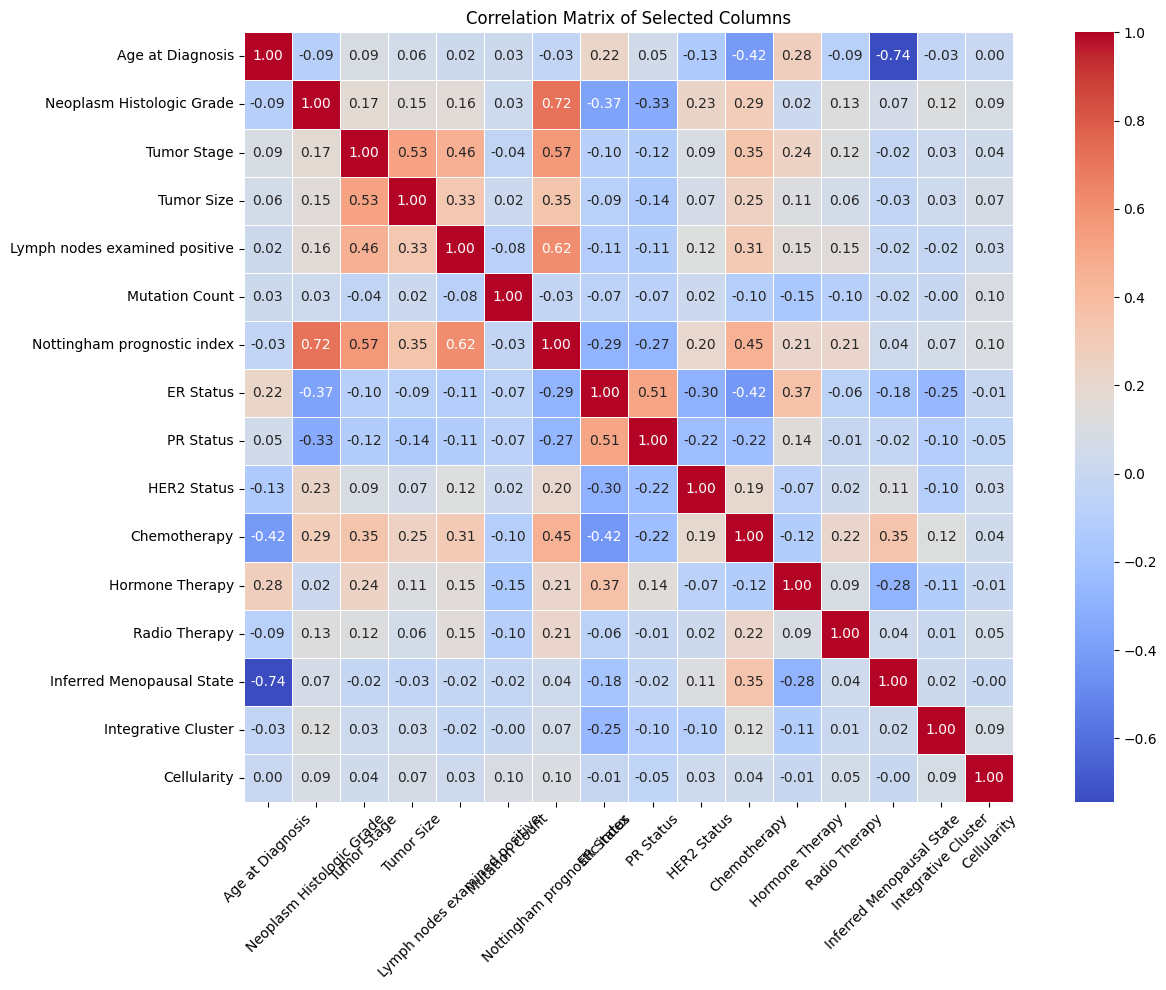

In [75]:
selected_cols = [
    'Age at Diagnosis', 'Neoplasm Histologic Grade', 'Tumor Stage',
    'Tumor Size', 'Lymph nodes examined positive', 'Mutation Count',
    'Nottingham prognostic index', 'ER Status', 'PR Status', 'HER2 Status',
    'Chemotherapy', 'Hormone Therapy', 'Radio Therapy',
    'Inferred Menopausal State', 'Integrative Cluster', 'Cellularity'
]

# Compute the correlation matrix
correlation_matrix = data[selected_cols].corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title("Correlation Matrix of Selected Columns")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [76]:
data["Patient's Vital Status"].value_counts()

Patient's Vital Status
Living                  499
Died of Disease         380
Died of Other Causes    249
Name: count, dtype: int64

In [77]:
# Filter out the unwanted value
data = data[data["Patient's Vital Status"] != "Died of Other Causes"]

In [78]:
le = LabelEncoder()

# Apply encoding
data["Patient's Vital Status"] = le.fit_transform(data["Patient's Vital Status"])

# Optional: Check encoded classes
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Died of Disease': np.int64(0), 'Living': np.int64(1)}


## Valid, train, test split

In [79]:
X = data.drop("Patient's Vital Status", axis=1)
y = data["Patient's Vital Status"]

# Step 2: First split into temp train (70%) and validation (30%)
X_train_temp, X_valid, y_train_temp, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Split 70% train into 80% train and 20% test → results in 56% train, 14% test
X_train, X_test, y_train, y_test = train_test_split(
    X_train_temp, y_train_temp, test_size=0.2, random_state=42, stratify=y_train_temp)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Valid: {X_valid.shape}, {y_valid.shape}")
print(f"Test:  {X_test.shape}, {y_test.shape}")

Train: (492, 16), (492,)
Valid: (264, 16), (264,)
Test:  (123, 16), (123,)


In [80]:

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Valid: {X_valid.shape}, {y_valid.shape}")
print(f"Test:  {X_test.shape}, {y_test.shape}")

Train: (492, 16), (492,)
Valid: (264, 16), (264,)
Test:  (123, 16), (123,)


In [81]:
X_train

,Age at Diagnosis,Neoplasm Histologic Grade,Tumor Stage,Tumor Size,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,ER Status,PR Status,HER2 Status,Chemotherapy,Hormone Therapy,Radio Therapy,Inferred Menopausal State,Integrative Cluster,Cellularity
1160,45.40,3.0,1.0,20.0,0.0,2.0,4.040,0,0,0,0,0,1,1,2,1
952,57.98,3.0,2.0,15.0,9.0,5.0,6.030,1,0,0,0,1,0,0,7,1
1107,36.35,3.0,2.0,23.0,3.0,4.0,5.046,0,0,1,1,1,0,1,5,1
426,71.21,3.0,2.0,21.0,1.0,5.0,5.042,1,1,0,0,1,1,0,2,2
484,66.09,2.0,1.0,13.0,0.0,3.0,3.026,1,1,0,0,1,1,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,40.04,1.0,1.0,1.0,0.0,5.0,2.002,1,1,0,0,0,0,1,4,0
176,29.98,3.0,2.0,14.0,0.0,4.0,4.028,1,1,0,0,0,0,1,10,2
1243,48.76,3.0,1.0,13.0,0.0,9.0,4.026,1,1,1,0,0,1,1,5,0
1408,81.57,2.0,2.0,35.0,3.0,11.0,4.070,1,1,0,0,1,0,0,8,2


In [82]:
models_params = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

In [83]:
best_models = {}

for name, mp in models_params.items():
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best cross-val accuracy: {grid.best_score_:.4f}")
    
    # Evaluate on validation set
    y_pred = grid.predict(X_valid)
    print(f"Validation Accuracy: {accuracy_score(y_valid, y_pred):.4f}")
    print(classification_report(y_valid, y_pred))
    
    best_models[name] = grid.best_estimator_
    print("="*60)

Running GridSearchCV for LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'lbfgs'}
Best cross-val accuracy: 0.6869
Validation Accuracy: 0.6364
              precision    recall  f1-score   support

           0       0.60      0.48      0.53       114
           1       0.66      0.75      0.70       150

    accuracy                           0.64       264
   macro avg       0.63      0.62      0.62       264
weighted avg       0.63      0.64      0.63       264

Running GridSearchCV for RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-val accuracy: 0.6970
Validation Accuracy: 0.6477
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       114
           1       0.68      0.71      0.70       150

    accuracy                           0.65       264
   macro avg       0.64      0.64      0.64       264
weighted avg       0.65    

## Using column that have high importance 

In [111]:
imp_data = data[[
    'Age at Diagnosis', 'Neoplasm Histologic Grade', 
    'Tumor Stage', 'Tumor Size','Lymph nodes examined positive',
    'Mutation Count', 'Nottingham prognostic index',
    'ER Status', 'PR Status', 'HER2 Status', "Patient's Vital Status"
]]

In [112]:
X = imp_data.drop("Patient's Vital Status", axis=1)
y = imp_data["Patient's Vital Status"]


In [113]:
# View class distribution in the target column
data["Patient's Vital Status"].value_counts()


Patient's Vital Status
1    499
0    380
Name: count, dtype: int64

## As you can see we'll getting huge difference in output of patient vital status so now we can use SMOTE to improve the accuracy. 

In [114]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [115]:
y_resampled.value_counts()

Patient's Vital Status
1    499
0    499
Name: count, dtype: int64

## Scaling

In [116]:
X_resampled.describe()

,Age at Diagnosis,Neoplasm Histologic Grade,Tumor Stage,Tumor Size,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,ER Status,PR Status,HER2 Status
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,58.111693,2.488689,1.782404,27.031006,2.010277,5.359801,4.205599,0.728457,0.478958,0.131263
std,12.443400,0.617644,0.622236,17.313545,3.818646,3.397078,1.050512,0.444978,0.499808,0.337857
min,21.930000,1.000000,1.000000,1.000000,0.000000,1.000000,2.002000,0.000000,0.000000,0.000000
25%,49.057500,2.000000,1.000000,17.000000,0.000000,3.000000,3.080000,0.000000,0.000000,0.000000
50%,57.970000,3.000000,2.000000,23.000000,0.515719,5.000000,4.050000,1.000000,0.000000,0.000000
75%,67.368718,3.000000,2.000000,30.000000,2.000000,7.000000,5.050000,1.000000,1.000000,0.000000
max,96.290000,3.000000,4.000000,180.000000,31.000000,30.000000,6.360000,1.000000,1.000000,1.000000


In [117]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)
print(X_scaled)

[[0.2859064  1.         0.         ... 1.         1.         0.        ]
 [0.74018289 1.         0.33333333 ... 1.         1.         0.        ]
 [0.76438946 1.         1.         ... 1.         1.         0.        ]
 ...
 [0.83638878 0.5        0.64557666 ... 1.         1.         0.        ]
 [0.48707934 1.         0.         ... 0.         0.         0.        ]
 [0.66753759 1.         0.33333333 ... 1.         0.         0.        ]]


In [118]:
df_scaled = pd.DataFrame(X_scaled)
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,0.486575,0.744345,0.260801,0.145425,0.064848,0.150338,0.505645,0.728457,0.478958,0.131263
std,0.167340,0.308822,0.207412,0.096724,0.123182,0.117141,0.241054,0.444978,0.499808,0.337857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364813,0.500000,0.000000,0.089385,0.000000,0.068966,0.247361,0.000000,0.000000,0.000000
50%,0.484669,1.000000,0.333333,0.122905,0.016636,0.137931,0.469940,1.000000,0.000000,0.000000
75%,0.611064,1.000000,0.333333,0.162011,0.064516,0.206897,0.699403,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
x = np.array(X_scaled)
y = np.array(y_resampled)

## Train_Test_Valid

In [121]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3,stratify=y)
X_test, X_val, y_test, y_val = train_test_split(x, y, test_size=0.5, stratify=y)

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

print("Model Evaluation using 5-Fold Cross-Validation:\n")

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} | Std Dev = {scores.std():.4f}")

Model Evaluation using 5-Fold Cross-Validation:

Logistic Regression: Mean Accuracy = 0.6318 | Std Dev = 0.0282
SVM: Mean Accuracy = 0.6360 | Std Dev = 0.0386
Random Forest: Mean Accuracy = 0.6847 | Std Dev = 0.0417
Decision Tree: Mean Accuracy = 0.6261 | Std Dev = 0.0211
KNN: Mean Accuracy = 0.6189 | Std Dev = 0.0289
Gradient Boosting: Mean Accuracy = 0.6862 | Std Dev = 0.0418
AdaBoost: Mean Accuracy = 0.6662 | Std Dev = 0.0333
Naive Bayes: Mean Accuracy = 0.6103 | Std Dev = 0.0105
XGBoost: Mean Accuracy = 0.6761 | Std Dev = 0.0413


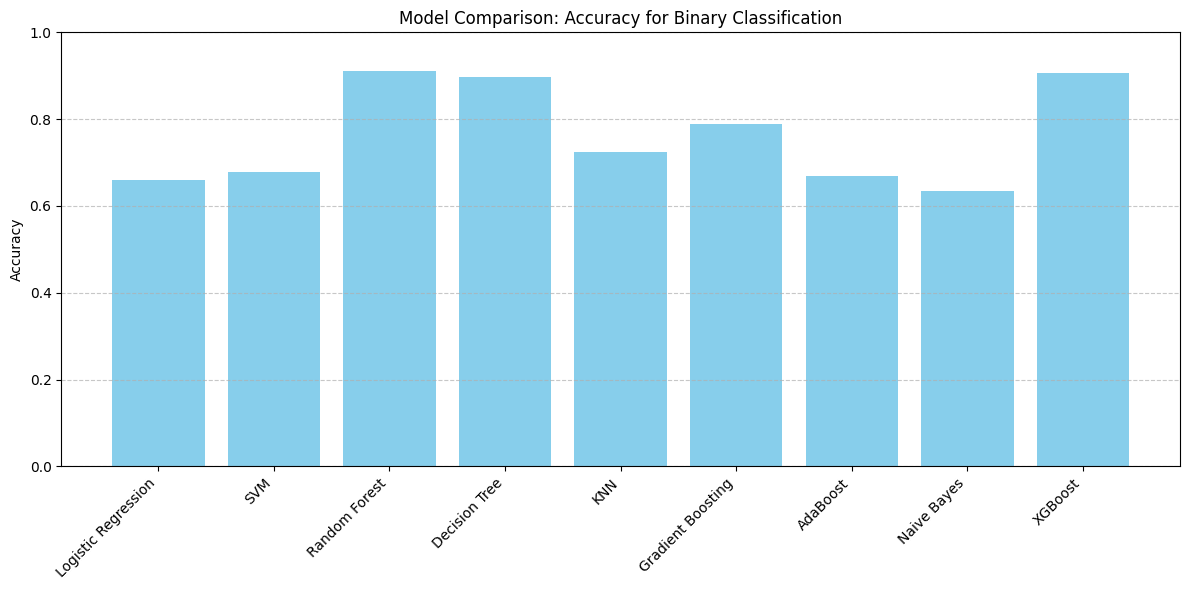

In [123]:
accuracies = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy for Binary Classification")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## so we'll use RandomForest instead of XGBoost because RandomForest is more simpler and less time consuming than XGBoost.

In [124]:
# For GridSearchCV: Smaller grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [125]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters (GridSearchCV):", grid_search.best_params_)
print("Best score (GridSearchCV):", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters (GridSearchCV): {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best score (GridSearchCV): 0.7019527235354573


## checking overfitting or underfitting

In [126]:
rf = RandomForestClassifier(bootstrap=True,max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5)

In [ ]:
y_pred = rf.predict(X_train)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print(f"training_accuracy : {accuracy}")


validation_accuracy : 0.9555873925501432


In [128]:
y_pred = rf.predict(X_val)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(f"validation_accuracy : {accuracy}")



validation_accuracy : 0.8617234468937875


In [132]:

# Cross-validation accuracy
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_accuracy = cv_scores.mean()
print(f"cross_val_training accuracy : {cv_accuracy}")

cross_val_training accuracy : 0.6947584789311408


In [136]:
# Cross-validation accuracy
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_accuracy = cv_scores.mean()
print(f"cross_val_training accuracy : {cv_accuracy}")

# Cross-validation accuracy
cv_scores = cross_val_score(rf, X_val, y_val, cv=5)
cv_accuracy = cv_scores.mean()
print(f"cross_val_validation accuracy : {cv_accuracy}")

cv_scores = cross_val_score(rf, X_test, y_test, cv=5)
cv_accuracy = cv_scores.mean()
print(f"cross_val_validation accuracy : {cv_accuracy}")

cross_val_training accuracy : 0.6932990750256937
cross_val_validation accuracy : 0.6692323232323233
cross_val_validation accuracy : 0.6932727272727273


cross_val_validation accuracy : 0.6892727272727273


In [137]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [139]:
rf.score(X_train, y_train)

0.828080229226361

In [140]:
from sklearn.metrics import accuracy_score

print("Train Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Validation Accuracy:", accuracy_score(y_val, rf.predict(X_val)))
print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Train Accuracy: 0.828080229226361
Validation Accuracy: 0.7835671342685371
Test Accuracy: 0.7895791583166333


here we can see a balance between these values and there is minor overfitting which is acceptable

## final model training 

In [143]:
import numpy as np

X_final_train = np.concatenate((X_train, X_val), axis=0)
y_final_train = np.concatenate((y_train, y_val), axis=0)

In [144]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
model.fit(X_final_train, y_final_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [146]:
model.score(X_final_train, y_final_train)

0.8872180451127819

## Model Evaluation

Accuracy: 0.7715
Precision: 0.7636
Recall: 0.7880
F1 Score: 0.7756


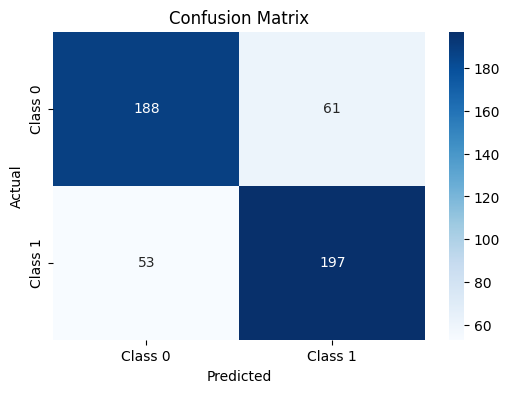


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       249
           1       0.76      0.79      0.78       250

    accuracy                           0.77       499
   macro avg       0.77      0.77      0.77       499
weighted avg       0.77      0.77      0.77       499



In [149]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on test set
y_pred = model.predict(X_test)

# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [152]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'minmaxscaler.pkl')

['minmaxscaler.pkl']